In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from gurobipy import *
import scipy.stats as st
from numpy.polynomial import Polynomial as P

In [2]:
#Indices
#i = potenciales albergues
#d = distritos que deben ser cubiertos
np.random.seed(1)
#IMPORTANTE: N es la cantidad de nodos, distritos d!!
N = 5
D = [d for d in range(N)]

aX = -40
bX = 40

aY = 0
bY = 500

X = {}
Y = {}
#X = {d:(bX-aX)*np.random.random()+aX for d in D}
#Y = {d:(bY-aY)*np.random.random()+aY for d in D}


c = 5
x = np.linspace(-50,50)
y = (1/c)*x**2


d = 0    
while len(X)<N and len(Y)<N:
    locX = (bX-aX)*np.random.random()+aX
    locY = (bY-aY)*np.random.random()+aY
    ev = (1/5)*locX**2
    if ev <= locY:
        X[d] = locX
        Y[d] = locY
        d+=1        
        
Tid = {(i,d):np.hypot(X[i]-X[d], Y[i]-Y[d])*10 for i in D for d in D}
FDisminucion = 0.1
Did ={(i,d):round(Tid[(i,d)]*FDisminucion,0) for i in D for d in D}
Cq = 1000
Ch = 1000
B = 100000
pd = {d:np.random.randint(low=10,high=26) for d in D}
maximo = max(list(pd.values()))
minimo = min(list(pd.values()))
#Cid = {(i,d):np.random.randint(low=500,high=550) for i in D for d in D}
Cid = {(i,d):np.hypot(X[i]-X[d], Y[i]-Y[d])*10 for i in D for d in D}

In [3]:
np.random.seed(1)
MCordX = [0]*(N)
MCordY = [0]*(N)
labels = [0]*(N)
for d in D:
    MCordX[d]=[X[(d)]+st.norm.ppf(np.random.random(), loc=0, scale=2) for j in range(pd[(d)])]
    MCordY[d] = [Y[(d)]+st.norm.ppf(np.random.random(), loc=0, scale=2) for j in range(pd[(d)])]
    labels[d] = [d for j in range(pd[(d)])]
Xpeq = []
Ypeq = []
labelsPeq = []
#for d in D:
#    for j in range(pd[(d)]):
#        Xpeq.append(MCordX[d][j])
#        Ypeq.append(MCordY[d][j])
#        labelsPeq.append(labels[d][j])

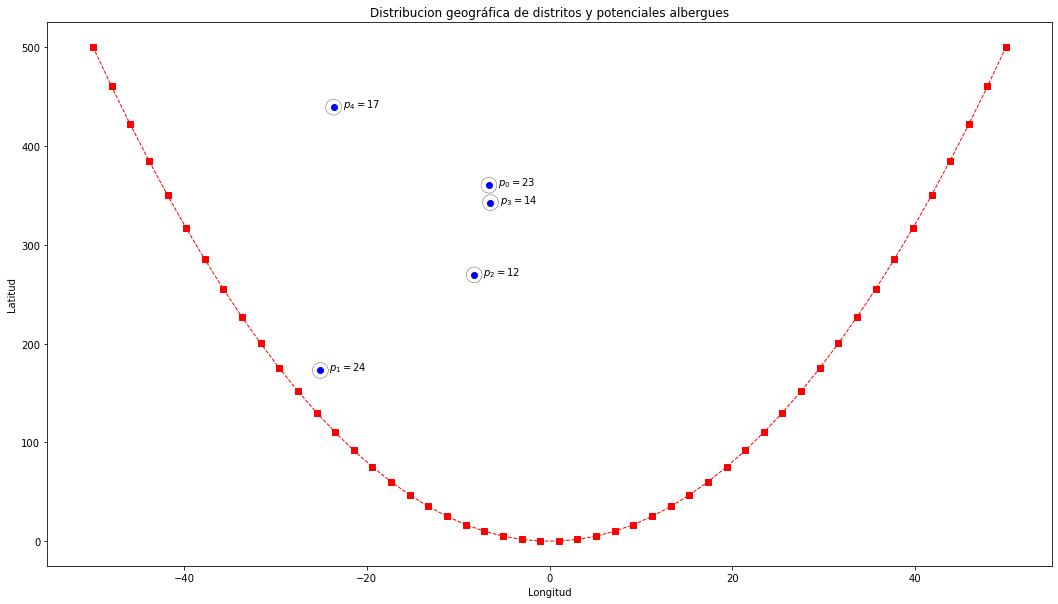

In [4]:
plt.figure(figsize=(18,10))
plt.scatter(x=list(X.values()), y=list(Y.values()), color='blue')
#for i in range(len(MCordX)):
#    coordenadasX = MCordX[i]
#    coordenadasY = MCordY[i]
    #for i in range(len(coordenadasX)):
    #    plt.plot(coordenadasX[i],coordenadasY[i], color='gray',marker='s', markersize=2)

plt.scatter(Xpeq, Ypeq, c=labelsPeq, s=10, cmap='viridis')


plt.plot(x, y,linewidth=1, linestyle='--', marker='s', color='red')
plt.scatter(x=list(X.values()), y=list(Y.values()), s=250, facecolors='none', edgecolors='black', linewidths=0.3)

for d in D:
    plt.annotate(text='$p_{%d}=%d$'%(d,pd[d]), xy=(X[d], Y[d]), xytext=(X[d]+1, Y[d]))
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribucion geográfica de distritos y potenciales albergues')
plt.show()

Sea $f(x)=\frac{x^2}{c}$ La curva que representa la costa del modelo. 

Si graficamos todos los puntos $P(x,y):f(x)=\frac{x^2}{c}$, tenemos que los puntos $(x, f(x)=\frac{x^2}{c})$

De lo anterior, se define lo siguiente: 

Sea $P_1(x, \frac{x^2}{c})$ la función curva que representa la curva del modelo prototipo.

Sea $P_2(x_1, y_1)$ un punto geoespacial ubicado en el plano euclidiano que representa el distrito d. 

Entonces función de distancia euclidiana se define como: 

$d(P_1, P_2) = \sqrt{(x-x_1)^2+\left(\frac{x^2}{c}-y_1\right)^2}$

Habiamos definido que mientras más cerca a la costa, debemos restringir estrictamente **NO** se deben enviar personas a una zona con mayor profundidad esperada de la ola de un tsunami. Se asume entonces que mientras más cercano es el distrito a la costa, los metros sobre el nivel del mar son menores y bajo esa premisa y lógica, entonces se define además que la distancia entre el punto del distrito y la curva que representa la costa, será la mínima entre este y la función. 

Es por ello que es necesario realizar lo siguiente: 

$\frac{\delta\left(d(P_1, P_2)\right)}{\delta(x)} = \frac{x-x_1+\frac{2x}{c}(\frac{x^2}{c}-y_1)}{\sqrt{(x-x_1)^2+\left(\frac{x^2}{c}-y_1\right)^2}}$

**Lo anterior hace referencia a una derivada con respecto al dominio de las x.**

Finalmente para encontrar máximos y mínimos, debemos encontrar todos los puntos que cumplan la siguiente relación: 

$2x^3 + x(c^2 -2cy_1)-c^2x_1=0$, donde c es la constante que divide a una función cuadrática y $x_1, y_1$ son la longitud y latitud representadas en el espacio euclidiano. 
En este caso c=5

In [5]:
class dist():
    def __init__(self, c):
        self.c = c
    def distanciaMinima(self, x1,y1):
        coeffs = [-self.c**2*x1,c**2-2*c*y1,0, 2]
        p = list(P(coeffs).roots())
        ds = []
        for x in p:
            #print(x)
            d = np.sqrt((x-x1)**2+((x**2)/c-y1)**2)
            ds.append(d)
        return min(ds)

In [6]:
#Probando que el método funciona correctamente. 
curva = dist(c)
distancia = curva.distanciaMinima(X[0], Y[0])
distancia

35.73558568803886

In [7]:
rd = {}
for d in X.keys():
    distancia = curva.distanciaMinima(X[d], Y[d]) if type(curva.distanciaMinima(X[d], Y[d]))=='numpy.float64' else curva.distanciaMinima(X[d], Y[d]).real
    rd[d] = distancia

## Definición de $H_d^{min}(H_i^{min})$

Se define $H_d^{min}$ de la siguiente manera: 

$H_d^{min} = \frac{max\{r_d\}}{r_d}$, $\forall d \in D$

### ¿Por qué?

Porque la altura mínima requerida para levantar un albergue vertical más cercano a la costa será mas alta que con respecto a uno que está mas lejos y que además el distrito mas lejano está con mas metros sobre el nivel del mar, por lo tanto debe existir una relación inversa. 

In [8]:
maxRd = max(rd.keys(), key=lambda k:rd[k])
Hdmin = {}
for d in rd.keys():
    Hdmin[d] = maxRd/rd[(d)]

### Comprobando supuestos...

Una manera fácil de comprobar que lo se definió es correcto, es observar una correlación negativa. 

In [9]:
correlacionDF = {'rd':list(rd.values()), 'Hdmin':list(Hdmin.values())}
correlacionDF = pandas.DataFrame(correlacionDF)
correlacionDF.corr()

,rd,Hdmin
rd,1.0,NaN
Hdmin,NaN,NaN


## Optimization Model
### Conjuntos

$D$ : Conjunto de distritos

$E$ : Conjunto de distritos prioritarios $E \subset D$, este conjunto de distritos deben ser atendidos bajo el criterio de calidad de servicio predefinido. 

$I$ : Conjunto de albergues




### Parámetros 

$r_d$ = Distancia mínima entre el distrito $d \in D$ y la costa (Dicho parámetro puede ser considerado como altura o profundidad en caso de tsunami) 

$T_{id}$ = Tiempo mínimo necesario de traslado entre el distrito $d \in D$ y el albergue $i \in I$ 

$\delta_{id}$ = Disminución de los tiempos mínimos requeridos a la conexión entre el distrito $d \in D$ y el albergue $i \in I$ producto de la inversión. 

$C_q, C_h$ = Costos unitarios asociados a la cantidad de personas en el distrito y la altura en metros respectivamente. 

$H_d^{min}$ = Altura mínima necesaria (en metros) en caso de construir un albergue vertical $i \in I$ en el distrito $d \in D$. 

$p_d$ = Población flotante estimada según el distrito $d \in D$. 

$C_{id}$ = Inversión total para crear o mejorar la conexión de carreteras entre el distrito $d \in D$ y el albergue vertical $i \in I$

$T^{max}$ = Tiempo máximo de traslado establecido por las autoridades. 

### Variables 

$y_i$ = 1, si se selecciona el albergue $i \in I$, 0 si no. 

$z_{id}$ = 1, si invierta en la conexión de ruta entre el distrito $d \in D$ hacia el albergue $i \in I$

$f_{id}$ = proporción de inversión en la conexión de ruta entre el distrito $d \in D$ hacia el albergue $i \in I$

$q_i$ = capacidad que deberá tener el albergue $i \in I$ en caso de abrirse e invertir en el.

$h_i$ = altura que deberá tener el albergue $i \in I$ en caso de abrirse e invertir en el. 

$\tau_{id}$ = Tiempo mejorado mínimo necesario de traslado desde el distrito $d \in D$ hacia el albergue $i \in I$


\begin{align}
    %Funciíon Obj
    Min Z = (f_1,-f_2,f_3) && (1)\\
    \\
    % Min. Tiempos de origen-destino
    f_1 = \sum_{i \in I}\$C^hh_i+\sum_{i \in I}\$C^qq_i+\sum_{i \in I}\sum_{d \in D}\$C_{id}f_{id} && (2)\\ \\
    f_2 = \sum_{i \in I}\sum_{d \in D}(p_d+p_i)(r_i-r_d)z_{id} && (3)\\ \\
    f_3 = \sum_{i \in I}\sum_{d \in D}\tau_{id}z_{id} && (4)
\end{align}

s.t.
\begin{align}
    \sum_{i \in I}z_{id} = 1 && \forall d \in E && (5)\\ \\
    z_{id}-y_i \leq 0 && \forall i \in I, d \in D && (6)\\ \\
    z_{id}-y_i = 0 && \forall i \in I, d \in D, i=d && (7)\\ \\
    f_{id}-z_{id} \leq 0 && \forall i \in I, d \in D && (8)\\ \\
    T_{id}-f_{id}\delta_{id} \leq \tau_{id} && \forall i \in I, d \in D && (9)\\ \\
    \sum_{d \in D}z_{id}p_d-q_i \leq 0 && \forall i \in I, y_i = 1 && (10)\\ \\
    h_i-H_d^{min}y_i \geq 0 && \forall i \in I && (11)\\ \\
    \tau_{id}z_{id} \leq T^{max} && \forall i \in I, d \in D && (12)\\ \\
    (r_i-r_d)z_{id} \geq 0 && \forall i \in I, d \in D && (13) \\ \\
    y_i+y_d = 1 && \forall i \in I, d \in D, z_{id}=1, i \neq d && (14) \\ \\
    \sum_{i \in I}z_{id} \leq 1 && \forall d \in D && (15)
\end{align}

In [10]:
class Normalization():
    
    def __init__(self, N,NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax):
        #Rangos generales
        self.N = N
        self.I = [i for i in range(N)]
        self.D = [d for d in self.I]
        self.ID = [(i,d) for i in self.I for d in self.D]
        self.NE = NE
        self.Tmax = Tmax
        
        #Parametros
        #Parametro nuevo
        self.rd = rd #rd = distancias mínimas calculadas a la curva 
        ##----------##
        self.Tid = Tid
        self.Did = Did
        self.Cq = Cq
        self.Ch = Ch
        self.Hdmin=Hdmin
        self.B = B
        self.pd = pd
        self.Cid = Cid
        
        
        self.E = []
        for k in range(1, self.NE+1):
            self.E.append(self.kmin(k, self.rd))
            
        #Nuevo rango
        self.IE = [(i,d) for i in self.I for d in self.E]
        
        ###-----###
        
        #Creación de un objeto modelo gurobi
        self.modelo = Model('LH')
        
    def generateVariables(self):
        #Variables modelo MACRO
        self.y = self.modelo.addVars(self.I, vtype=GRB.BINARY, name='y')
        self.z = self.modelo.addVars(self.ID, vtype=GRB.BINARY, name='z')
        self.f = self.modelo.addVars(self.ID,lb=0.0, ub=1, vtype=GRB.CONTINUOUS, name='f')
        self.q = self.modelo.addVars(self.I, vtype=GRB.CONTINUOUS, name='q')
        self.h = self.modelo.addVars(self.I, vtype=GRB.CONTINUOUS, name='h')
        self.tau = self.modelo.addVars(self.ID, vtype=GRB.CONTINUOUS, name='tau')
        #Linealización del modelo
        self.f3 = self.modelo.addVar(vtype=GRB.CONTINUOUS, name='f3')
    def SetObjectives(self, weightf1, weightf2, weightf3, sense):
        
        self.modelo.setObjectiveN(quicksum(self.Cq*self.q[(i)]+self.Ch*self.h[(i)] for i in self.I)
                                   +quicksum(self.Cid[(i,d)]*self.f[(i,d)] for i,d in self.ID), 
                                  index=0, name='f1', weight=weightf1)
        
        self.modelo.setObjectiveN(-(quicksum((self.pd[d]+self.pd[i])*(self.rd[i]-self.rd[d])*self.z[(i,d)] for i,d in self.ID)), 
                                  index=1, name='f2', 
                                  weight=weightf2)
        
        self.modelo.setObjectiveN((self.f3), index=2, name='f3', weight=weightf3)
        
        self.modelo.ModelSense = sense
    def generateConstraints(self):
        self.modelo.addQConstr(lhs=quicksum(self.tau[(i,d)]*self.z[(i,d)] for i,d in self.ID)-self.f3, sense=GRB.EQUAL, rhs=0, 
                               name='f3')
        #Restriccion asociada a que toda la demanda debe ser cumplida
        for d in self.E: 
            self.modelo.addConstr(quicksum(self.z[(i,d)] for i in self.I)==1, name='(1)')
            
        #Restriccion asociada a que si está habilitado i, se puede invertir ruta desde d hacia i
        
        for i,d in self.ID:
            self.modelo.addConstr(self.z[(i,d)]-self.y[i]<=0, name='(2)')
            if i == d:
                self.modelo.addConstr(self.z[(i,d)]-self.y[i]==0, name='(3)')
            self.modelo.addConstr(self.f[(i,d)]-self.z[(i,d)]<=0, name='Restriccion logica')

        for i,d in self.ID:
            self.modelo.addConstr(self.Tid[(i,d)]-self.f[(i,d)]*self.Did[(i,d)]-self.tau[(i,d)]<=0, 
                                  name='Inversion disminucion tiempos')

        #Restriccion asociada a que existe un máximo de demanda a abastecer y la idea es cubrir ese
        #parámetro en la medida de lo posible
        for i in self.I:
            self.modelo.addGenConstrIndicator(binvar=self.y[i], binval=True, 
                                              lhs=quicksum(self.z[(i,d)]*self.pd[d] for d in D)-self.q[i], sense=GRB.LESS_EQUAL,
                                              rhs=0, name='(4)')
        

        #Restriccion asociada al presupuesto sin considerar la inversión por ruta
        #modelo.addConstr(quicksum(Ch*h[i] for i in I)+quicksum(Cq*q[i] for i in I)+quicksum(Cid[(i,d)]*z[(i,d)] for i,d in ID)<=B, 
        #                 name='(5)')

        #La suma de todos los que irán desde el distrito d hacia el albuergue i, debe ser abastecida por la variable 
        #de capacidad
        #for i in I:
        #    modelo.addConstr(quicksum(f[(i,d)] for d in D)<=q[i], name='(6)')


        #Si se instala un albergue en el distrito d, este debe cumplir una altura mínima requerida
        for i in self.I:
            self.modelo.addConstr(self.h[i]-self.Hdmin[i]*self.y[i]>=0, name='(7)')


        for i,d in self.ID:
            self.modelo.addQConstr(self.tau[(i,d)]*self.z[(i,d)]<=self.Tmax, name='Limite tiempo')

        
        for i,d in self.ID:
            self.modelo.addConstr((self.rd[i]-self.rd[d])*self.z[(i,d)]>=0, name='R.N')
            
        for i,d in self.ID:
            if i!=d:
                self.modelo.addGenConstrIndicator(binvar=self.z[(i,d)], binval=True,
                                                  lhs=self.y[i]+self.y[d], sense=GRB.LESS_EQUAL, rhs=1, name='R.N.1')
                
        
        for d in self.D:
            self.modelo.addConstr(quicksum(self.z[(i,d)] for i in self.I)<=1, name='R.N.2')
        
        #model.addGenConstrIndicator(x7, True, x1 + 2*x2 + x4, GRB.EQUAL, 1.0)
        #modelo.addGenConstrIndicator(binvar=z[(i,d)], binval=True, lhs=)
    def optimize(self):
        self.modelo.optimize()
    def objetivos(self):
        nombreVectorObj = ['f1', '-f2', 'f3']
        vectorObjectivos = []
        for s in range(self.modelo.SolCount):
            componentes = []
            self.modelo.params.SolutionNumber=0
            for o in range(self.modelo.NumObj):
                self.modelo.params.ObjNumber=o
                componentes.append(self.modelo.ObjNVal)
            vectorObjectivos.append(componentes)
        #print(nombreVectorObj)
        for i in vectorObjectivos:
            return i
        
    def kmin(self, k, diccionario):
        dic = diccionario.copy()
        if k == 1:
            minimo = min(dic.keys(), key=lambda l:dic[l])
        else:
            for l in range(k-1):
                minimoGlobal = min(dic.keys(), key=lambda j:dic[j])
                dic.pop(minimoGlobal)
            minimo = min(dic.keys(), key=lambda j:dic[j])
        return minimo

    def kmax(self, k, diccionario):
        dic = diccionario.copy()
        if k == 1:
            maximo = max(dic.keys(), key=lambda j:dic[j])
        else:
            for l in range(k-1):
                maximoGlobal = max(dic.keys(), key=lambda j:dic[j])
                dic.pop(maximoGlobal)
            maximo = max(dic.keys(), key=lambda j:dic[j])
        return maximo

In [11]:
NE = 5
Tmax = 200

## Normalización de  $f_1$

Sea $f_1^*$ el valor mínimo de la función objetivo, despreciando al resto de funciones.

Entonces la normalización se da por la siguiente expresión:

$f_1^{norm} = \frac{f_1-f_1^*}{f_1^*}$. Donde $f_1^{norm} \in [0,1]$

In [12]:
LHs = Normalization(N, NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax)
LHs.generateVariables()
#weightf1,weightf2,weightf3
LHs.SetObjectives(1,0,0,1)
LHs.generateConstraints()
LHs.optimize()
solucion = LHs.objetivos()
minf1 = solucion[0]

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-11
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 120 rows, 91 columns and 230 nonzeros
Model fingerprint: 0x0fa016db
Model has 26 quadratic constraints
Model has 25 general constraints
Variable types: 61 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [9e-01, 3e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 3e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+03]
  QRHS range       [2e+02, 2e+02]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 2e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined) ...
---------------------------------------------------------------------------
--------

In [13]:
minf1

90000.0

## Normalización de $f_2$

Como $f_2$ es de maximización y no existe cota inferior por restricción, es decir que es cero, entonces la función de normalización es la siguiente: 

$f_2^{norm}=\frac{f_2}{f_2^*}$, donde $f_2 \in [0,1]$

In [14]:
LHs = Normalization(N, NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax)
LHs.generateVariables()
#weightf1,weightf2,weightf3
LHs.SetObjectives(0,1,0,1)
LHs.generateConstraints()
LHs.optimize()
solucion = LHs.objetivos()
maxf2 = -solucion[1]

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 120 rows, 91 columns and 230 nonzeros
Model fingerprint: 0x8dbbaa13
Model has 26 quadratic constraints
Model has 25 general constraints
Variable types: 61 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [9e-01, 3e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 3e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+03]
  QRHS range       [2e+02, 2e+02]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 2e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined) ...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Multi-objectives: opti

In [15]:
maxf2

32.36625688487673

## Normalización f3

La función f3 tiene cotas inferiores y superiores. Son calculables ambas, por restricción y optimización.

Teniendo en cuenta que se busca minimizar $f_3$, se tiene:

$f_3^{norm}=\frac{f_3-f_3^*}{f_3^{max}-f_3^*}$

In [16]:
LHs = Normalization(N, NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax)
LHs.generateVariables()
#weightf1,weightf2,weightf3
LHs.SetObjectives(0,0,1,1)
LHs.generateConstraints()
LHs.optimize()
solucion = LHs.objetivos()
minf3 = round(solucion[2],0)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 120 rows, 91 columns and 230 nonzeros
Model fingerprint: 0xe88d66cb
Model has 26 quadratic constraints
Model has 25 general constraints
Variable types: 61 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [9e-01, 3e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 3e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+03]
  QRHS range       [2e+02, 2e+02]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 2e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined) ...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Multi-objectives: opti

In [17]:
LHs = Normalization(N, NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax)
LHs.generateVariables()
#weightf1,weightf2,weightf3
LHs.SetObjectives(0,0,1,-1)
LHs.generateConstraints()
LHs.optimize()
solucion = LHs.objetivos()
maxf3 = solucion[2]

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 120 rows, 91 columns and 230 nonzeros
Model fingerprint: 0x6de659da
Model has 26 quadratic constraints
Model has 25 general constraints
Variable types: 61 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [9e-01, 3e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 3e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+03]
  QRHS range       [2e+02, 2e+02]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 2e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined) ...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Multi-objectives: opti

In [18]:
maxf3

1000.0

In [19]:
class StrategicLHProblem():
    
    def __init__(self, N,NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax, minf1, maxf2, minf3, maxf3):
        #Rangos generales
        self.N = N
        self.I = [i for i in range(N)]
        self.D = [d for d in self.I]
        self.ID = [(i,d) for i in self.I for d in self.D]
        self.NE = NE
        self.Tmax = Tmax
        
        #Parametros
        #Parametro nuevo
        self.rd = rd #rd = distancias mínimas calculadas a la curva 
        ##----------##
        self.Tid = Tid
        self.Did = Did
        self.Cq = Cq
        self.Ch = Ch
        self.Hdmin=Hdmin
        self.B = B
        self.pd = pd
        self.Cid = Cid
        
        #Valores de normalización
        #f1
        self.minf1 = minf1
        #f2
        self.maxf2 = maxf2
        #f3
        self.minf3 = minf3
        self.maxf3 = maxf3
        
        self.E = []
        for k in range(1, self.NE+1):
            self.E.append(self.kmin(k, self.rd))
            
        #Nuevo rango
        self.IE = [(i,d) for i in self.I for d in self.E]
        
        ###-----###
        
        #Creación de un objeto modelo gurobi
        self.modelo = Model('LH')
        
    def generateVariables(self):
        #Variables modelo MACRO
        self.y = self.modelo.addVars(self.I, vtype=GRB.BINARY, name='y')
        self.z = self.modelo.addVars(self.ID, vtype=GRB.BINARY, name='z')
        self.f = self.modelo.addVars(self.ID,lb=0.0, ub=1, vtype=GRB.CONTINUOUS, name='f')
        self.q = self.modelo.addVars(self.I, vtype=GRB.CONTINUOUS, name='q')
        self.h = self.modelo.addVars(self.I, vtype=GRB.CONTINUOUS, name='h')
        self.tau = self.modelo.addVars(self.ID, vtype=GRB.CONTINUOUS, name='tau')
        #Linealización del modelo
        self.f3 = self.modelo.addVar(vtype=GRB.CONTINUOUS, name='f3')
    def SetObjectives(self, weightf1, weightf2, weightf3, sense):
        
        self.modelo.setObjectiveN((quicksum(self.Cq*self.q[(i)]+self.Ch*self.h[(i)] for i in self.I)
                                   +quicksum(self.Cid[(i,d)]*self.f[(i,d)] for i,d in self.ID))/self.minf1, 
                                  index=0, name='f1', weight=weightf1)
        
        self.modelo.setObjectiveN(-((quicksum((self.pd[d]+self.pd[i])*(self.rd[i]-self.rd[d])*self.z[(i,d)] for i,d in self.ID))/self.maxf2), 
                                  index=1, name='f2', 
                                  weight=weightf2)
        
        self.modelo.setObjectiveN((self.f3-self.minf3)/(self.maxf3-self.minf3), index=2, name='f3', weight=weightf3)
        
        self.modelo.ModelSense = sense
    def generateConstraints(self):
        self.modelo.addQConstr(lhs=quicksum(self.tau[(i,d)]*self.z[(i,d)] for i,d in self.ID)-self.f3, sense=GRB.EQUAL, rhs=0, 
                               name='f3')
        #Restriccion asociada a que toda la demanda debe ser cumplida
        for d in self.E: 
            self.modelo.addConstr(quicksum(self.z[(i,d)] for i in self.I)==1, name='(1)')
            
        #Restriccion asociada a que si está habilitado i, se puede invertir ruta desde d hacia i
        
        for i,d in self.ID:
            self.modelo.addConstr(self.z[(i,d)]-self.y[i]<=0, name='(2)')
            if i == d:
                self.modelo.addConstr(self.z[(i,d)]-self.y[i]==0, name='(3)')
            self.modelo.addConstr(self.f[(i,d)]-self.z[(i,d)]<=0, name='Restriccion logica')

        for i,d in self.ID:
            self.modelo.addConstr(self.Tid[(i,d)]-self.f[(i,d)]*self.Did[(i,d)]-self.tau[(i,d)]<=0, 
                                  name='Inversion disminucion tiempos')

        #Restriccion asociada a que existe un máximo de demanda a abastecer y la idea es cubrir ese
        #parámetro en la medida de lo posible
        for i in self.I:
            self.modelo.addGenConstrIndicator(binvar=self.y[i], binval=True, 
                                              lhs=quicksum(self.z[(i,d)]*self.pd[d] for d in D)-self.q[i], sense=GRB.LESS_EQUAL,
                                              rhs=0, name='(4)')
        

        #Restriccion asociada al presupuesto sin considerar la inversión por ruta
        #modelo.addConstr(quicksum(Ch*h[i] for i in I)+quicksum(Cq*q[i] for i in I)+quicksum(Cid[(i,d)]*z[(i,d)] for i,d in ID)<=B, 
        #                 name='(5)')

        #La suma de todos los que irán desde el distrito d hacia el albuergue i, debe ser abastecida por la variable 
        #de capacidad
        #for i in I:
        #    modelo.addConstr(quicksum(f[(i,d)] for d in D)<=q[i], name='(6)')


        #Si se instala un albergue en el distrito d, este debe cumplir una altura mínima requerida
        for i in self.I:
            self.modelo.addConstr(self.h[i]-self.Hdmin[i]*self.y[i]>=0, name='(7)')


        for i,d in self.ID:
            self.modelo.addQConstr(self.tau[(i,d)]*self.z[(i,d)]<=self.Tmax, name='Limite tiempo')

        
        for i,d in self.ID:
            self.modelo.addConstr((self.rd[i]-self.rd[d])*self.z[(i,d)]>=0, name='R.N')
            
        for i,d in self.ID:
            if i!=d:
                self.modelo.addGenConstrIndicator(binvar=self.z[(i,d)], binval=True,
                                                  lhs=self.y[i]+self.y[d], sense=GRB.LESS_EQUAL, rhs=1, name='R.N.1')
                
        
        for d in self.D:
            self.modelo.addConstr(quicksum(self.z[(i,d)] for i in self.I)<=1, name='R.N.2')
        
        #model.addGenConstrIndicator(x7, True, x1 + 2*x2 + x4, GRB.EQUAL, 1.0)
        #modelo.addGenConstrIndicator(binvar=z[(i,d)], binval=True, lhs=)
    def optimize(self):
        self.modelo.optimize()
    def objetivos(self):
        nombreVectorObj = ['f1', '-f2', 'f3']
        vectorObjectivos = []
        for s in range(self.modelo.SolCount):
            componentes = []
            self.modelo.params.SolutionNumber=0
            for o in range(self.modelo.NumObj):
                self.modelo.params.ObjNumber=o
                componentes.append(self.modelo.ObjNVal)
            vectorObjectivos.append(componentes)
        #print(nombreVectorObj)
        for i in vectorObjectivos:
            return i
        
    def kmin(self, k, diccionario):
        dic = diccionario.copy()
        if k == 1:
            minimo = min(dic.keys(), key=lambda l:dic[l])
        else:
            for l in range(k-1):
                minimoGlobal = min(dic.keys(), key=lambda j:dic[j])
                dic.pop(minimoGlobal)
            minimo = min(dic.keys(), key=lambda j:dic[j])
        return minimo

    def kmax(self, k, diccionario):
        dic = diccionario.copy()
        if k == 1:
            maximo = max(dic.keys(), key=lambda j:dic[j])
        else:
            for l in range(k-1):
                maximoGlobal = max(dic.keys(), key=lambda j:dic[j])
                dic.pop(maximoGlobal)
            maximo = max(dic.keys(), key=lambda j:dic[j])
        return maximo

In [20]:
LH = StrategicLHProblem(N, NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax, minf1, maxf2, minf3, maxf3)
LH.generateVariables()
#weightf1,weightf2,weightf3
LH.SetObjectives(1,1,1,1)
LH.generateConstraints()
LH.optimize()
solucion = LH.objetivos()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 120 rows, 91 columns and 230 nonzeros
Model fingerprint: 0x2d18b890
Model has 26 quadratic constraints
Model has 25 general constraints
Variable types: 61 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [9e-01, 3e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e-03, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+03]
  QRHS range       [2e+02, 2e+02]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 2e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined) ...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Multi-objectives: opti

In [21]:
solucion

[1.0019503729965809, -0.9999999999999999, 0.15753356969227547]

In [22]:
arcos_activos = [(i,d) for i,d in LH.ID if LH.z[(i,d)].X!=0]
albergues = [i for i in LH.I if LH.y[i].X!=0]
X_albergues = {i:X[i] for i in albergues}
Y_albergues = {i:Y[i] for i in albergues}

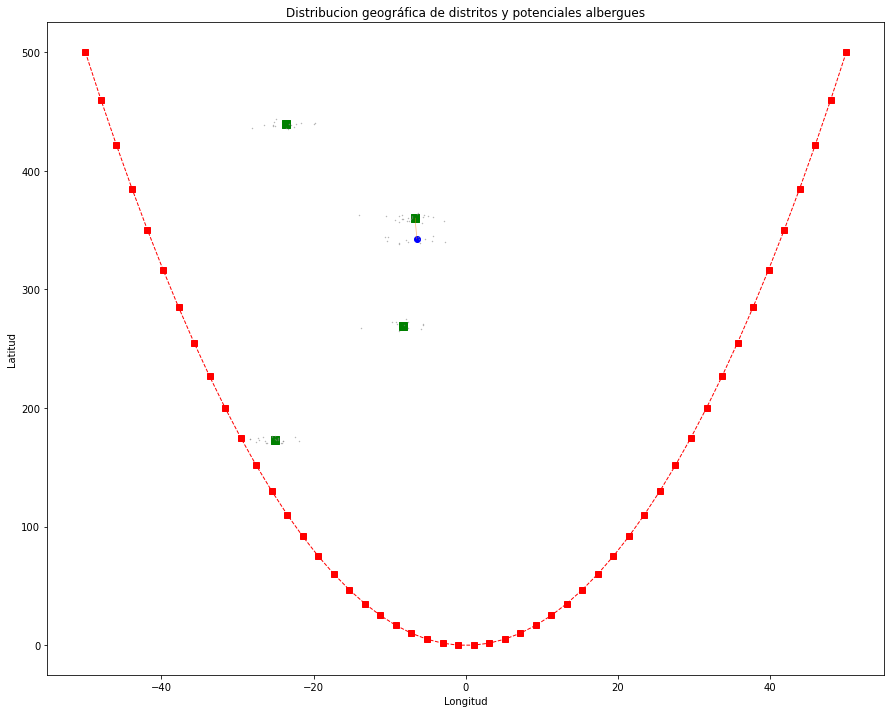

In [23]:
plt.figure(figsize=(15,12))
plt.scatter(x=list(X.values()), y=list(Y.values()), color='blue')
plt.scatter(x=list(X_albergues.values()), y=list(Y_albergues.values()), color='green', s=50, marker='s')


for i in range(len(MCordX)):
    coordenadasX = MCordX[i]
    coordenadasY = MCordY[i]
    for i in range(len(coordenadasX)):
        plt.plot(coordenadasX[i],coordenadasY[i], color='gray',marker='s', markersize=0.5, alpha=0.5)

plt.scatter(Xpeq, Ypeq, c=labelsPeq, s=10, cmap='viridis')
for k in arcos_activos:
    albergue = k[0]
    distrito = k[1]
    plt.plot([X[albergue],X[distrito]], [Y[albergue],Y[distrito]],linewidth=0.5, label='(%d,%d)='%(albergue,distrito), alpha=0.8)

plt.plot(x, y,linewidth=1, linestyle='--', marker='s', color='red')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribucion geográfica de distritos y potenciales albergues')
plt.show()

In [24]:
#Indices
#i = potenciales albergues
#d = distritos que deben ser cubiertos
np.random.seed(1)
#IMPORTANTE: N es la cantidad de nodos, distritos d!!

aX = -40
bX = 40

aY = 0
bY = 500

Xc = {}
Yc = {}
x = list(np.linspace(-40, 40, 11))
y = list(np.linspace(0,480,11))
contador=0
for i in range(len(x)):
    for j in range(len(y)):
        Xc[contador]=x[i]
        Yc[contador]=y[j]
        contador+=1

c = 5
x = np.linspace(-50,50)
y = (1/c)*x**2
X = {}
Y = {}
contador = 0
for d in Xc.keys():
    ev = (1/5)*Xc[d]**2
    if ev <= Yc[d]:
        X[contador]=Xc[d]
        Y[contador]=Yc[d]
        contador+=1

N = len(X)
D = [d for d in range(N)]
       
        
Tid = {(i,d):np.hypot(X[i]-X[d], Y[i]-Y[d])*10 for i in D for d in D}
FDisminucion = 0.1
Did ={(i,d):round(Tid[(i,d)]*FDisminucion,0) for i in D for d in D}
Cq = 1000
Ch = 1000
B = 100000
pd = {d:np.random.randint(low=10,high=26) for d in D}
maximo = max(list(pd.values()))
minimo = min(list(pd.values()))
#Cid = {(i,d):np.random.randint(low=500,high=550) for i in D for d in D}
Cid = {(i,d):np.hypot(X[i]-X[d], Y[i]-Y[d])*10 for i in D for d in D}

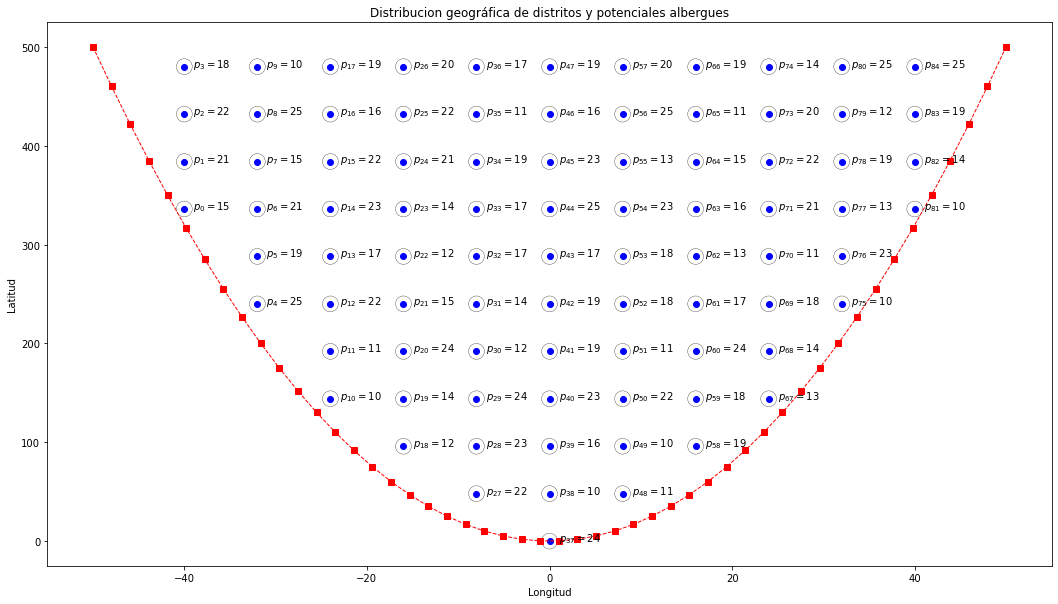

In [25]:
plt.figure(figsize=(18,10))
plt.scatter(x=list(X.values()), y=list(Y.values()), color='blue')
#for i in range(len(MCordX)):
#    coordenadasX = MCordX[i]
#    coordenadasY = MCordY[i]
    #for i in range(len(coordenadasX)):
    #    plt.plot(coordenadasX[i],coordenadasY[i], color='gray',marker='s', markersize=2)

plt.scatter(Xpeq, Ypeq, c=labelsPeq, s=10, cmap='viridis')


plt.plot(x, y,linewidth=1, linestyle='--', marker='s', color='red')
plt.scatter(x=list(X.values()), y=list(Y.values()), s=250, facecolors='none', edgecolors='black', linewidths=0.3)

for d in D:
    plt.annotate(text='$p_{%d}=%d$'%(d,pd[d]), xy=(X[d], Y[d]), xytext=(X[d]+1, Y[d]))
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribucion geográfica de distritos y potenciales albergues')
plt.show()

In [45]:
rd = {}
for d in X.keys():
    distancia = curva.distanciaMinima(X[d], Y[d]) if type(curva.distanciaMinima(X[d], Y[d]))=='numpy.float64' else curva.distanciaMinima(X[d], Y[d]).real
    rd[d] = distancia
maxRd = max(rd.keys(), key=lambda k:rd[k])
Hdmin = {}
for d in rd.keys():
    Hdmin[d] = maxRd/rd[(d)] if maxRd/rd[(d)] != np.inf else 0

C:\Users\Csotelo\AppData\Local\Temp/ipykernel_21532/1186305384.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  Hdmin[d] = maxRd/rd[(d)] if maxRd/rd[(d)] != np.inf else 0


### Normalización $f_1$

In [47]:
LHs = Normalization(N, NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax)
LHs.generateVariables()
#weightf1,weightf2,weightf3
LHs.SetObjectives(1,0,0,1)
LHs.generateConstraints()
LHs.optimize()
solucion = LHs.objetivos()
minf1 = solucion[0]

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 29160 rows, 21931 columns and 58320 nonzeros
Model fingerprint: 0x100aae4c
Model has 7226 quadratic constraints
Model has 7225 general constraints
Variable types: 14621 continuous, 7310 integer (7310 binary)
Coefficient statistics:
  Matrix range     [7e-03, 5e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [2e-01, 5e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+03]
  QRHS range       [2e+02, 2e+02]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 3e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined) ...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Mult

### Normalización $f_2$

In [48]:
LHs = Normalization(N, NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax)
LHs.generateVariables()
#weightf1,weightf2,weightf3
LHs.SetObjectives(0,1,0,1)
LHs.generateConstraints()
LHs.optimize()
solucion = LHs.objetivos()
maxf2 = -solucion[1]

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 29160 rows, 21931 columns and 58320 nonzeros
Model fingerprint: 0xe0d23127
Model has 7226 quadratic constraints
Model has 7225 general constraints
Variable types: 14621 continuous, 7310 integer (7310 binary)
Coefficient statistics:
  Matrix range     [7e-03, 5e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [2e-01, 5e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+03]
  QRHS range       [2e+02, 2e+02]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 3e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined) ...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Mult

### Normalización $f_3$

In [49]:
LHs = Normalization(N, NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax)
LHs.generateVariables()
#weightf1,weightf2,weightf3
LHs.SetObjectives(0,0,1,1)
LHs.generateConstraints()
LHs.optimize()
solucion = LHs.objetivos()
minf3 = round(solucion[2],0)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 29160 rows, 21931 columns and 58320 nonzeros
Model fingerprint: 0x0c165241
Model has 7226 quadratic constraints
Model has 7225 general constraints
Variable types: 14621 continuous, 7310 integer (7310 binary)
Coefficient statistics:
  Matrix range     [7e-03, 5e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [2e-01, 5e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+03]
  QRHS range       [2e+02, 2e+02]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 3e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined) ...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Mult

In [50]:
LHs = Normalization(N, NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax)
LHs.generateVariables()
#weightf1,weightf2,weightf3
LHs.SetObjectives(0,0,1,-1)
LHs.generateConstraints()
LHs.optimize()
solucion = LHs.objetivos()
maxf3 = solucion[2]

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 29160 rows, 21931 columns and 58320 nonzeros
Model fingerprint: 0x06a2688a
Model has 7226 quadratic constraints
Model has 7225 general constraints
Variable types: 14621 continuous, 7310 integer (7310 binary)
Coefficient statistics:
  Matrix range     [7e-03, 5e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [2e-01, 5e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+03]
  QRHS range       [2e+02, 2e+02]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 3e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined) ...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Mult

In [51]:
NE = 15
LH = StrategicLHProblem(N, NE, Tid, Did, Cq, Ch, Hdmin, B, pd, rd, Cid, Tmax, minf1, maxf2, minf3, maxf3)
LH.generateVariables()
#weightf1,weightf2,weightf3
LH.SetObjectives(1,1,1,1)
LH.generateConstraints()
LH.optimize()
solucion = LH.objetivos()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 29170 rows, 21931 columns and 59170 nonzeros
Model fingerprint: 0xf7a73e2f
Model has 7226 quadratic constraints
Model has 7225 general constraints
Variable types: 14621 continuous, 7310 integer (7310 binary)
Coefficient statistics:
  Matrix range     [7e-03, 5e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [9e-06, 8e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+03]
  QRHS range       [2e+02, 2e+02]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 3e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined) ...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Mult

In [52]:
solucion

[2.7047458907017647, -0.09574874970196488, 0.042352941176470586]

In [53]:
arcos_activos = [(i,d) for i,d in LH.ID if LH.z[(i,d)].X!=0]
albergues = [i for i in LH.I if LH.y[i].X!=0]
X_albergues = {i:X[i] for i in albergues}
Y_albergues = {i:Y[i] for i in albergues}

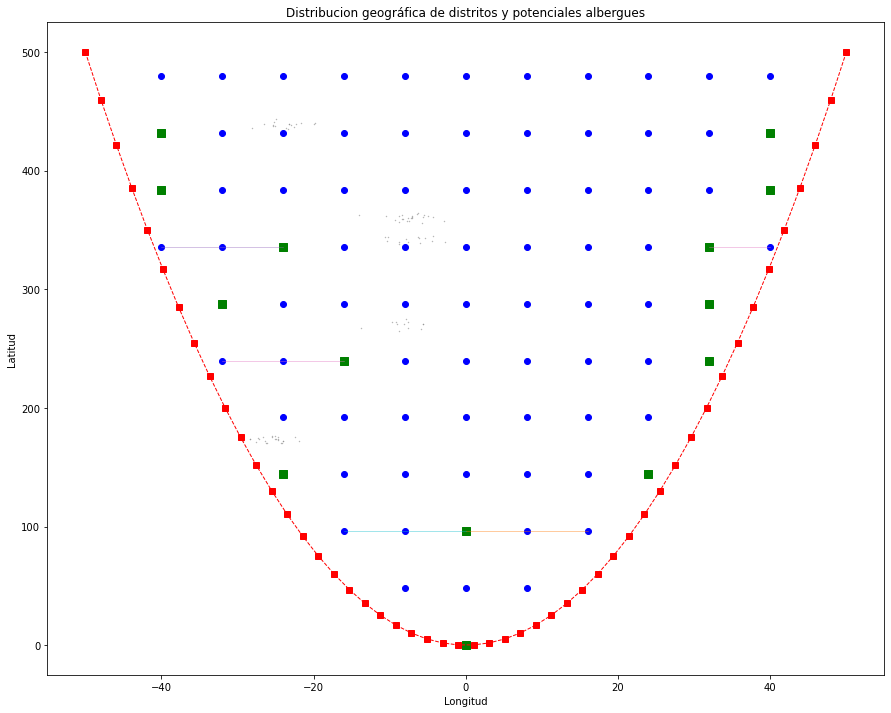

In [54]:
plt.figure(figsize=(15,12))
plt.scatter(x=list(X.values()), y=list(Y.values()), color='blue')
plt.scatter(x=list(X_albergues.values()), y=list(Y_albergues.values()), color='green', s=50, marker='s')


for i in range(len(MCordX)):
    coordenadasX = MCordX[i]
    coordenadasY = MCordY[i]
    for i in range(len(coordenadasX)):
        plt.plot(coordenadasX[i],coordenadasY[i], color='gray',marker='s', markersize=0.5, alpha=0.5)

plt.scatter(Xpeq, Ypeq, c=labelsPeq, s=10, cmap='viridis')
for k in arcos_activos:
    albergue = k[0]
    distrito = k[1]
    plt.plot([X[albergue],X[distrito]], [Y[albergue],Y[distrito]],linewidth=0.5, label='(%d,%d)='%(albergue,distrito), alpha=0.8)

plt.plot(x, y,linewidth=1, linestyle='--', marker='s', color='red')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribucion geográfica de distritos y potenciales albergues')
plt.show()